In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

sys.path.insert(0, '../src')
from linear_regression import LinearRegression
from plotters import plot_loss, plot_image

np.random.seed(43)

In [3]:
houses = sklearn.datasets.fetch_california_housing(data_home='../data')
data = pd.DataFrame(houses.data, columns=houses.feature_names)
data['Price'] = houses.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
target_col = 'Price'
feature_cols = list(data.columns.drop(target_col))

In [5]:
mask = np.ones(data.shape[0])
for col in feature_cols:
    mask = np.logical_and(mask, (data[col] < data[col].quantile(0.99)).values)
filtered_data = data[mask]

In [6]:
stats = filtered_data.describe()
mean = stats.loc['mean']
std = stats.loc['std']
new_data = (filtered_data - mean) / std

In [7]:
def train_model(df, model, feature_cols, target_col, n_iters, batch_size):
    
    x = np.array(df[feature_cols])
    y = np.array(df[target_col])
    
    loss = []
        
    for i in tqdm(range(n_iters)):
        batch_idx = np.random.randint(0, x.shape[0], size=batch_size)

        batch_x = x[batch_idx]
        batch_y = y[batch_idx]
        
        L = model.train(batch_x, batch_y)

        loss.append(L)
        if i % 100 == 0:
            model.lr /= 2

    return loss

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\Vanek\Documents\Python_scripts\Linear_regression\plotters.py:456: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


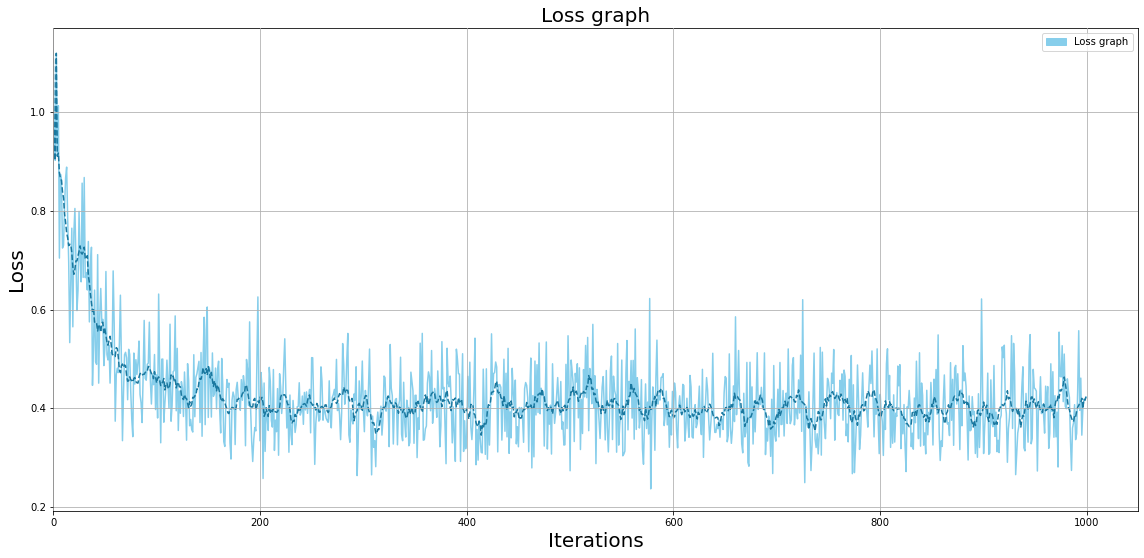

In [8]:
model = LinearRegression(n_features=8, lr=1e-4)
loss = train_model(new_data, model, feature_cols, target_col, n_iters=1000, batch_size=150)
plot_loss(np.array(loss), figsize=(16,8), final_mean=None)

In [9]:
x = np.array(new_data[feature_cols])
y = np.array(new_data[target_col])
model.evaluate(x, y)

array(0.40307803)

In [10]:
loss

[array(1.12623525),
 array(0.93303131),
 array(0.90278528),
 array(1.11977755),
 array(0.91125494),
 array(1.01344503),
 array(0.70454499),
 array(0.87459457),
 array(0.86304777),
 array(0.72497238),
 array(0.73055881),
 array(0.81055915),
 array(0.86724953),
 array(0.88898609),
 array(0.78510009),
 array(0.69607521),
 array(0.53315196),
 array(0.65677122),
 array(0.76517333),
 array(0.56516737),
 array(0.75630508),
 array(0.8051799),
 array(0.7017533),
 array(0.5981085),
 array(0.63940773),
 array(0.79923917),
 array(0.70316543),
 array(0.65642489),
 array(0.85650859),
 array(0.66539747),
 array(0.86794375),
 array(0.66498456),
 array(0.67528443),
 array(0.63986838),
 array(0.73819019),
 array(0.57514453),
 array(0.68537924),
 array(0.72651589),
 array(0.4464905),
 array(0.52736025),
 array(0.6396838),
 array(0.49428079),
 array(0.48913828),
 array(0.71154071),
 array(0.45092843),
 array(0.58866306),
 array(0.64294616),
 array(0.57524411),
 array(0.58028681),
 array(0.48653947),
 arra